# <center>Iteracyjne równania liniowe i macierze rzadkie</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [38]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pympler import asizeof 
from scipy.sparse import diags
import random
from scipy.sparse import csr_matrix, csc_matrix


**Cel zajęć:** Celem zajęć jest zapoznanie się z macierzami rzadkimi, oraz iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Czyli dana jest macierz [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) $\mathbf{A}$ o wymiarach ($m\times m$) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***

W macierzy rzadkiej większość elementów wynosi 0, w związku z tym przechowywanie wprost takiej macierzy w pamięci jest niepraktyczne. Do przechowywania i wykonywania operacji na macierzach rzadkich służy moduł [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html). 
1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich.
Na protrzeby ninejszego laboratorium wykorzystany zostanie format [Compressed Sparse Column](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html#scipy.sparse.csc_array)  
2. Przedstaw na jednym wykresie (scatter plot) dla 10 równo rozmieszczonych wartości $m$ z zakresu od $100$ do $10000$ ile pamięci zajmuje ta sama macierz o wymiarach ($m\times m$) w zapisana w formacie $numpy.ndarray$ oraz w formacie $scipy.sparse.csc\_array$ 

Do obliczenia rozmiaru zmiennych monżna wykorzystać funkcję [asizeof.asizeof()](https://pympler.readthedocs.io/en/latest/library/asizeof.html#)

3. Z czego wynika taki wygląd wykresu?


In [39]:
# Generowanie macierzy w formacie scipy.sparse.csc_array
m = 100
A = sp.sparse.random(m, m, density=0.01, format='csc')

# Uzyskanie reprezentacji tej samej macierzy w formacie numpy.ndarray
np_A = A.toarray()

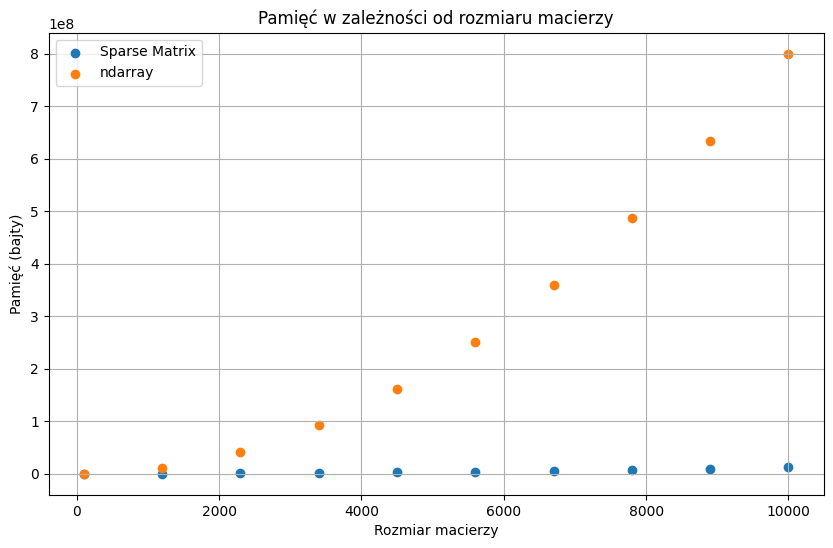

In [40]:
m = np.linspace(100,10000,10,dtype=int)
pamiec_sparse = []
pamiec_ndarray = []
for i in m:
    A = sp.sparse.random(i, i, density=0.01, format='csc')
    np_A = A.toarray()
    pamiec_sparse.append(asizeof.asizeof(A))
    pamiec_ndarray.append(asizeof.asizeof(np_A))

plt.figure(figsize=(10, 6))

plt.scatter(m, pamiec_sparse, label='Sparse Matrix')
plt.scatter(m, pamiec_ndarray, label='ndarray')

plt.title('Pamięć w zależności od rozmiaru macierzy')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Pamięć (bajty)')
plt.legend()
plt.grid(True)
plt.show()

Macierze rzadkie (scipy.sparse) zajmują mniej pamięci niż macierze gęste (numpy.ndarray) ze względu na przechowywanie tylko wartości niezerowych oraz ich indeksów. Ta efektywność wynika z redukcji pamięciowej, zwłaszcza w przypadku dużych macierzy, gdzie większość wartości jest zerowa. Mimo mniejszego zużycia pamięci, operacje na macierzach rzadkich mogą być bardziej złożone obliczeniowo z powodu ich struktury. Wybór pomiędzy macierzami rzadkimi a gęstymi zależy od konkretnych wymagań operacyjnych i obliczeniowych w danym kontekście problemu. Optymalne wykorzystanie macierzy rzadkich przyczynia się do oszczędności pamięciowych w przypadku dużych zbiorów danych z dużym udziałem wartości zerowych.

***Zadanie 2***

Moduł [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) implementuje operacje na macierzach rzadkich w dowolnym formacie.  
1. Wygeneruj dwie macierze $\mathbf{A}$  i $\mathbf{B}$ o wymiarach $1000\times 1000$  
2. Porównaj przy pomocy funkcji $\%timeit$ czas potrzebny na wykonanie mnożenia macierzowe $\mathbf{A * B}$  zapisanych w formacie $numpy.ndarray$ oraz $scipy.sparse.csc\_array$ 
3. Z czego wynika różnica?

In [41]:
A = sp.sparse.random(1000, 1000, density=0.01, format='csc')
np_A = A.toarray()

B = sp.sparse.random(1000, 1000, density=0.01, format='csc')
np_B = B.toarray()

def mnozenie_sparse(A,B):
    res = A * B
    return res
def mnozenie_ndarray(np_A, np_B):
    res = np_A * np_B
    return res

czas_sparse = %timeit -r 10 -n 100 -o mnozenie_sparse(A, B)
czas_ndarray = %timeit -r 10 -n 100 -o mnozenie_ndarray(np_A, np_B)


1.21 ms ± 124 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
3.78 ms ± 399 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


Różnica w czasie wykonywania operacji na macierzach rzadkich i gęstych wynika głównie z ich struktury przechowywania danych. Macierze gęste przechowują wszystkie wartości, podczas gdy macierze rzadkie ograniczają się do niezerowych elementów, co zmniejsza liczbę wykonywanych operacji. Wydajność operacji na macierzach gęstych jest zazwyczaj wyższa, ponieważ operacje są prostsze, jednak zajmują one więcej pamięci. Macierze rzadkie są bardziej oszczędne pamięciowo, co jest korzystne dla dużych zbiorów danych z dużym udziałem wartości zerowych, choć mogą wymagać dodatkowych obliczeń z powodu swojej struktury. Ostateczny wybór zależy od wymagań dotyczących wydajności obliczeniowej i zużycia pamięci w konkretnych zastosowaniach.

***Zadanie 3***  

Aby metody iteracyjne znalazły rozwiązanie układu należy zadbać o to by macierz $\mathbf{A}$ w układzie $\mathbf{Ax}=\mathbf{b}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcanie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, w związku z czym na potrzeby tego zadania należy sprawdzić czy wygenerowaliśmy macierz o odpowiedniej własności, aby pominąć krok przekształcania.

1. Uzupełnij funkcję $is\_diagonaly\_dominant()$ w pliku $main.py$ zgodnie z opisem  
(podpowiedź: korzystanie z pętli for nie jest dobrym rozwiązaniem, ponieważ często mamy do czynienia z bardzo dużymi wymiarami, przy których pętle zajmują bardzo duożo czasu. Skoprzystaj z funkcji [np.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), oraz [np.diagonal()](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html))  

2. Wygeneruj przy pomocy funkcji $generate\_matrix()$ macierz $\mathbf{A}$ o wymiarach $1000\times 1000$. Przy pomocy funkcji z poprzedniego punktu zweryfikuj, czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor $\mathbf{b}$ $1000\times 1$


    
Istnieje wiele metod iteracyjnego rozwiązywania równań, nie różnią się one znacząco od siebie w kwesti wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. W przypadku wyboru drugiej opcji należy zadbać o to aby macierz była dodatnio określona, poprzez podanie argumentu $is\_simetrical = True$

3. Korzystając z funkcji $residual\_norm()$ z pliku $main.py$ zbadaj wpływ argumentów $tol$ i $maxiter$ na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów  
4. Opisz zaobserwowane zależności 


In [42]:
from main import is_diagonaly_dominant
import scipy.sparse

def generate_matrix(m=1000, is_simetrical=False):
    if is_simetrical:
        num_u = np.random.randint(2, m//2)
        num_l = np.random.randint(2, m//2)
        diagonal_values = np.random.rand(num_u)
        matrix = diags(diagonal_values, list(range(0, num_u)), shape=(m, m))
        matrix = matrix + matrix.T
        a = matrix.toarray()
        np.fill_diagonal(a, np.sum(np.abs(a), axis=1) - np.abs(np.diagonal(a)) + np.random.rand(m))
        return sp.sparse.csc_array(a)
    else:
        num_u = np.random.randint(2, m//2)
        num_l = np.random.randint(2, m//2)
        diagonal_values = np.random.rand(num_u + num_l)
        matrix = diags(diagonal_values, list(range(-num_l, num_u)), shape=(m, m))
        a = matrix.toarray()
        np.fill_diagonal(a, np.sum(np.abs(a), axis=1) - np.abs(np.diagonal(a)) + np.random.rand(m))
        return sp.sparse.csc_array(a)
b = np.random.rand(1000, 1)
A = generate_matrix()
print (is_diagonaly_dominant(A)) 

False


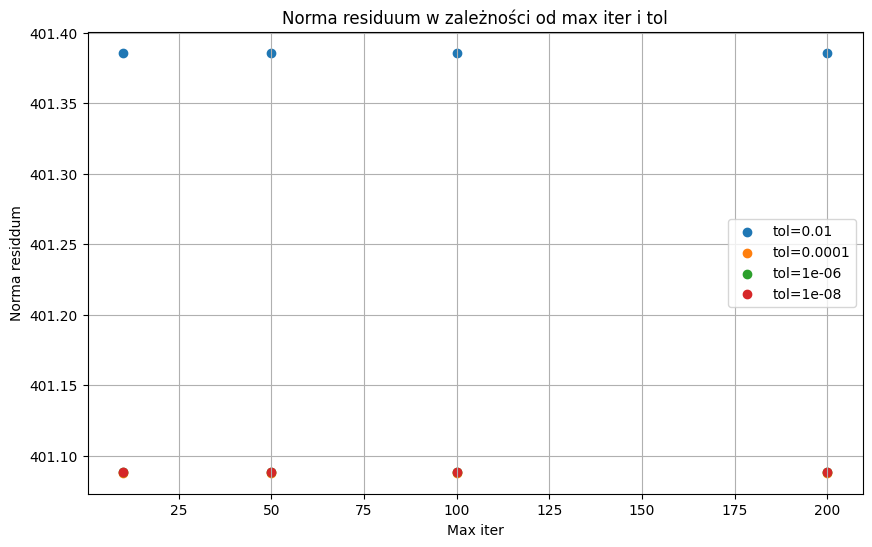

In [43]:
import matplotlib.pyplot as plt
from main import residual_norm
import scipy.sparse as sp
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt

tolerances = [1e-2, 1e-4, 1e-6, 1e-8]
max_iterations = [10, 50, 100, 200]

plt.figure(figsize=(10, 6))

for tol in tolerances:
    residuals = []
    for max_iter in max_iterations:
        x, _ = spla.gmres(A, b, tol=tol, maxiter=max_iter)
        residual = residual_norm(A, x, b)
        residuals.append(residual)
    
    plt.scatter(max_iterations, residuals, label=f"tol={tol}")

plt.xlabel('Max iter')
plt.ylabel('Norma residdum')
plt.title('Norma residuum w zależności od max iter i tol')
plt.legend()
plt.grid(True)
plt.show()


Do tego ćwiczenia użyłem metody GMRES. Wartość residuum nieznacznie się różni dla różnych wartości tol. Można powiedzieć również, że nie zmienia się w zależności od wartości maxiter. Z tego powodu podejrzewam, że wykonałem zadanie niepoprawnie, gdyż norma residuum wraz ze wzrostem wartości tol i maxiter powinna rosnąć. Nie zgadza się to jednak z wartościami na moim wykresie.

Wnioski
Na tych ćwiczeniach nauczyłem się tworzyć macierze rzadkie przy pomocy modułu scpiy.sparse i operować nimi. Dowiedziałem się również dlaczego są one dobrym wyborem przy tworzeniu większych macierzy. Poznałem również sposób iteracyjnego rozwiązywania układ macierzy przy pomocy funkcji GMRES.